# Задание
Требуется выполнить следующие действия<cite data-cite="ue:dz"></cite>:

1. Поиск и выбор набора данных для&nbsp;построения моделей машинного обучения. На&nbsp;основе выбранного набора данных студент должен построить модели машинного обучения для&nbsp;решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для&nbsp;понимания структуры данных. Анализ и заполнение пропусков в&nbsp;данных.
3. Выбор признаков, подходящих для&nbsp;построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о&nbsp;возможности построения моделей машинного обучения. В&nbsp;зависимости от&nbsp;набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для&nbsp;последующей оценки качества моделей. Необходимо выбрать не&nbsp;менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для&nbsp;решения задачи классификации или регрессии. Необходимо использовать не&nbsp;менее трех моделей, хотя бы одна из&nbsp;которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на&nbsp;основе исходного набора данных.
8. Построение базового решения (baseline) для&nbsp;выбранных моделей без&nbsp;подбора гиперпараметров. Производится обучение моделей на&nbsp;основе обучающей выборки и оценка качества моделей на&nbsp;основе тестовой выборки.
9. Подбор гиперпараметров для&nbsp;выбранных моделей. Рекомендуется подбирать не&nbsp;более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В&nbsp;зависимости от&nbsp;используемой библиотеки можно применять функцию `GridSearchCV`, использовать перебор параметров в&nbsp;цикле, или использовать другие методы.
10. Повторение пункта 8 для&nbsp;найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с&nbsp;качеством baseline-моделей.
11. Формирование выводов о&nbsp;качестве построенных моделей на&nbsp;основе выбранных метрик.

# Ход выполнения работы

## Выбор набора данных
В&nbsp;качестве набора данных используются метрологические данные с&nbsp;метеостанции HI-SEAS (Hawaii Space Exploration Analog and Simulation) за&nbsp;четыре месяца (с&nbsp;сентября по&nbsp;декабрь 2016&nbsp;года) и использовался в&nbsp;соревновании Space Apps Moscow 2017 в&nbsp;категории «You are my Sunshine» для&nbsp;построения приложения для&nbsp;предсказания мощности солнечного излучения и планирования работы исследовательской станции<cite data-cite="data:sunshine,kg:srp"></cite>. Данный набор данных доступен по&nbsp;следующему адресу: <https://www.kaggle.com/dronio/SolarEnergy>.

### Текстовое описание набора данных
Выбранный набор данных состоит из&nbsp;одного файла `SolarPrediction.csv`, содержащего все данные датасета. Данный файл содержит следующие колонки:

* `UNIXTime` — временная метка измерения в&nbsp;формате UNIX;
* `Data` — дата измерения;
* `Time` — время измерения (в&nbsp;местной временной зоне);
* `Radiation` — солнечное излучение ($\text{Вт}/\text{м}^2$);
* `Temperature` — температура (°F);
* `Pressure` — атмосферное давление (дюймов ртутного столба);
* `Humidity` — относительная влажность (%);
* `WindDirection(Degrees)` — направление ветра (°);
* `Speed` — скорость ветра (миль/ч);
* `TimeSunRise` — время восхода (в&nbsp;местной временной зоне);
* `TimeSunSet` — время заката (в&nbsp;местной временной зоне).

### Постановка задачи и предварительный анализ набора данных
Очевидно, что данный набор данных предполагает задачу регрессии, а&nbsp;именно предсказание колонки `Radiation` — мощности солнечного излучения. При&nbsp;этом:

* Колонка `UNIXTime` сама по&nbsp;себе довольно бесполезна, так как просто монотонно растёт с&nbsp;течением времени, не&nbsp;давая какую-либо информацию для&nbsp;модели машинного обучения. Вместе с&nbsp;тем, колонка `Time` может быть довольно интересной, особенно вместе с&nbsp;колонками `TimeSunRise` и `TimeSunSet`, так как вместе они показывают положение солнца на&nbsp;небе и точно задают возможный максимум солнечной энергии.
* Колонка `Data` могла бы быть полезна, если бы данные были за&nbsp;больший промежуток времени (например, несколько лет), и отражала бы сезонность солнечного излучения. К&nbsp;сожалению в&nbsp;нашем случае она практически полностью бесполезна.
* Остальные колоки предоставляют данные, которые теоретически могут показывать, сколько именно солнечной энергии доходит до&nbsp;поверхности, то есть по&nbsp;факту по&nbsp;ним необходимо предсказывать облачность.

## Проведение разведочного анализа данных

Подключим все необходимые библиотеки:

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Настроим отображение графиков<cite data-cite="doc:ipython,doc:seaborn"></cite>:

In [2]:
# Enable inline plots
%matplotlib inline

# Set plot style
sns.set(style="ticks")

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

Зададим ширину текстового представления данных, чтобы в&nbsp;дальнейшем текст в&nbsp;отчёте влезал на&nbsp;А4<cite data-cite="doc:pandas"></cite>:

In [3]:
pd.set_option("display.width", 70)

### Предварительная подготовка данных

Загрузим описанный выше набор данных:

In [4]:
data = pd.read_csv("./SolarPrediction.csv")

Преобразуем временные колонки в соответствующий временной формат:

In [5]:
data["Time"] = (pd
                    .to_datetime(data["UNIXTime"], unit="s", utc=True)
                    .dt.tz_convert("Pacific/Honolulu")).dt.time

data["TimeSunRise"] = (pd
                       .to_datetime(data["TimeSunRise"],
                                    infer_datetime_format=True)
                       .dt.time)

data["TimeSunSet"] = (pd
                      .to_datetime(data["TimeSunSet"],
                                   infer_datetime_format=True)
                      .dt.time)

data = data.rename({"WindDirection(Degrees)": "WindDirection"},
                   axis=1)

Проверим полученные типы:

In [6]:
data.dtypes

UNIXTime           int64
Data              object
Time              object
Radiation        float64
Temperature        int64
Pressure         float64
Humidity           int64
WindDirection    float64
Speed            float64
TimeSunRise       object
TimeSunSet        object
dtype: object

Посмотрим на данные в&nbsp;данном наборе данных:

In [7]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


Очевидно, что все эти временные характеристики в&nbsp;таком виде нам не&nbsp;особо интересны. Преобразуем все нечисловые столбцы в&nbsp;числовые. Для&nbsp;преобразования времени в&nbsp;секунды используем следующий метод<cite data-cite="so:dttseconds"></cite>:

In [8]:
def time_to_second(t):
    return ((datetime.combine(datetime.min, t) - datetime.min)
            .total_seconds())

In [9]:
df = data.copy()

timeInSeconds = df["Time"].map(time_to_second)

sunrise = df["TimeSunRise"].map(time_to_second)
sunset = df["TimeSunSet"].map(time_to_second)
df["DayPart"] = (timeInSeconds - sunrise) / (sunset - sunrise)

df = df.drop(["UNIXTime", "Data", "Time",
              "TimeSunRise", "TimeSunSet"], axis=1)

df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,DayPart
0,1.21,48,30.46,59,177.39,5.62,1.475602
1,1.21,48,30.46,58,176.78,3.37,1.468588
2,1.23,48,30.46,57,158.75,3.37,1.461713
3,1.21,48,30.46,60,137.71,3.37,1.454653
4,1.17,48,30.46,62,104.95,5.62,1.447778


In [10]:
df.dtypes

Radiation        float64
Temperature        int64
Pressure         float64
Humidity           int64
WindDirection    float64
Speed            float64
DayPart          float64
dtype: object

С&nbsp;такими данными уже можно работать. Проверим размер набора данных:

In [11]:
df.shape

(32686, 7)

Проверим основные статистические характеристики набора данных:

In [12]:
df.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,DayPart
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,0.482959
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,0.602432
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,-0.634602
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,-0.040139
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,0.484332
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,1.006038
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,1.566061


Проверим наличие пропусков в&nbsp;данных:

In [13]:
df.isnull().sum()

Radiation        0
Temperature      0
Pressure         0
Humidity         0
WindDirection    0
Speed            0
DayPart          0
dtype: int64

### Визуальное исследование датасета

Оценим распределение целевого признака — мощности солнечного излучения:

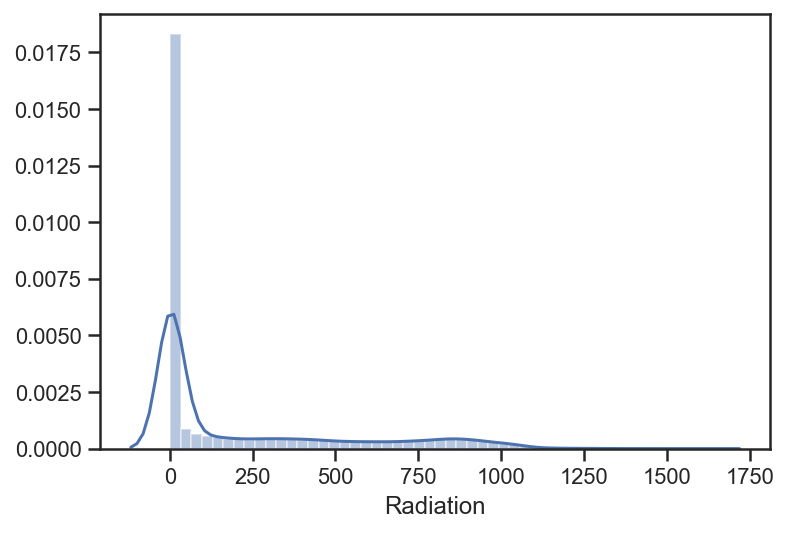

In [14]:
sns.distplot(df["Radiation"]);

Видно, что имеется большой перевес в&nbsp;пользу практически нулевого излучения. Оценим, наскольки мощность солнечного излучения зависит от&nbsp;наличия солнца на&nbsp;небе:

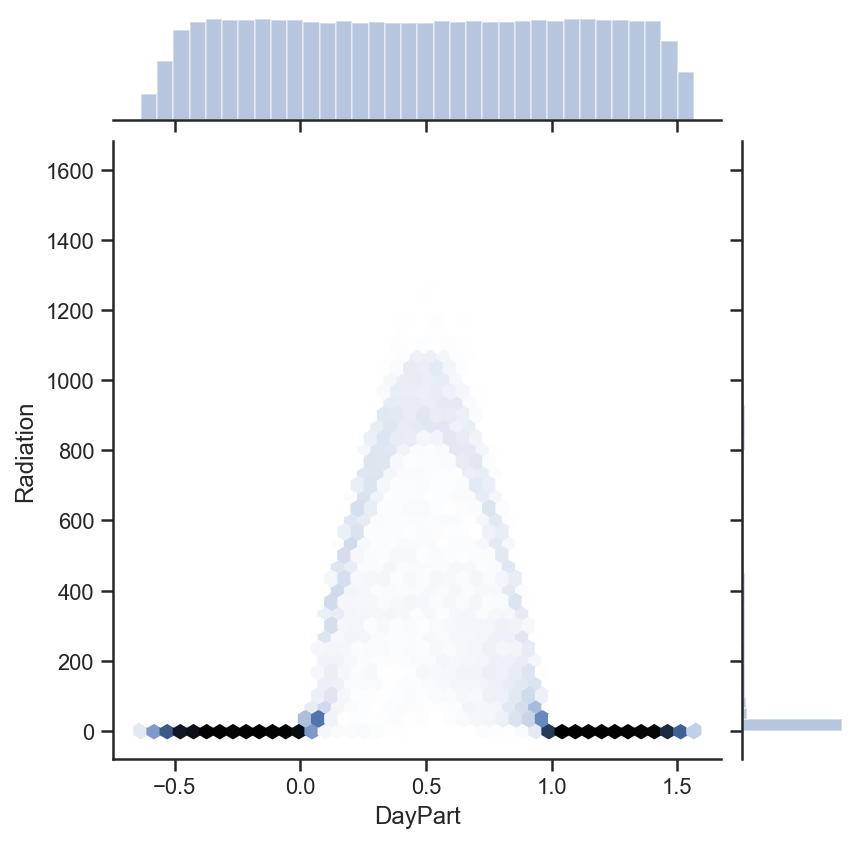

In [15]:
sns.jointplot(x="DayPart", y="Radiation", data=df, kind="hex");

Видно, что если солнца нет на&nbsp;небе, то мощность солнечного излучения стремится к&nbsp;нулю. Посмотрим на&nbsp;распределение мощности излучения в&nbsp;течение дня:

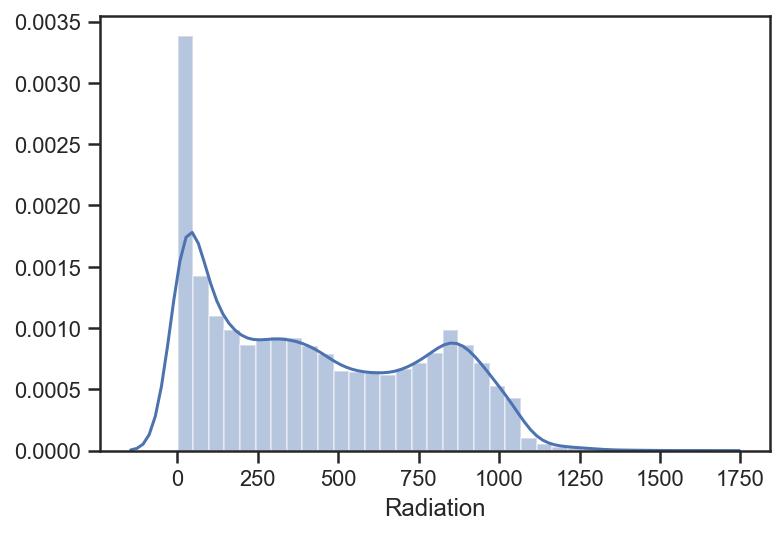

In [16]:
dfd = df[(df["DayPart"] >= 0) & (df["DayPart"] <= 1)]
sns.distplot(dfd["Radiation"]);

Теперь оценить влияние времени дня на мощность солнечного излучения будет заметно проще:

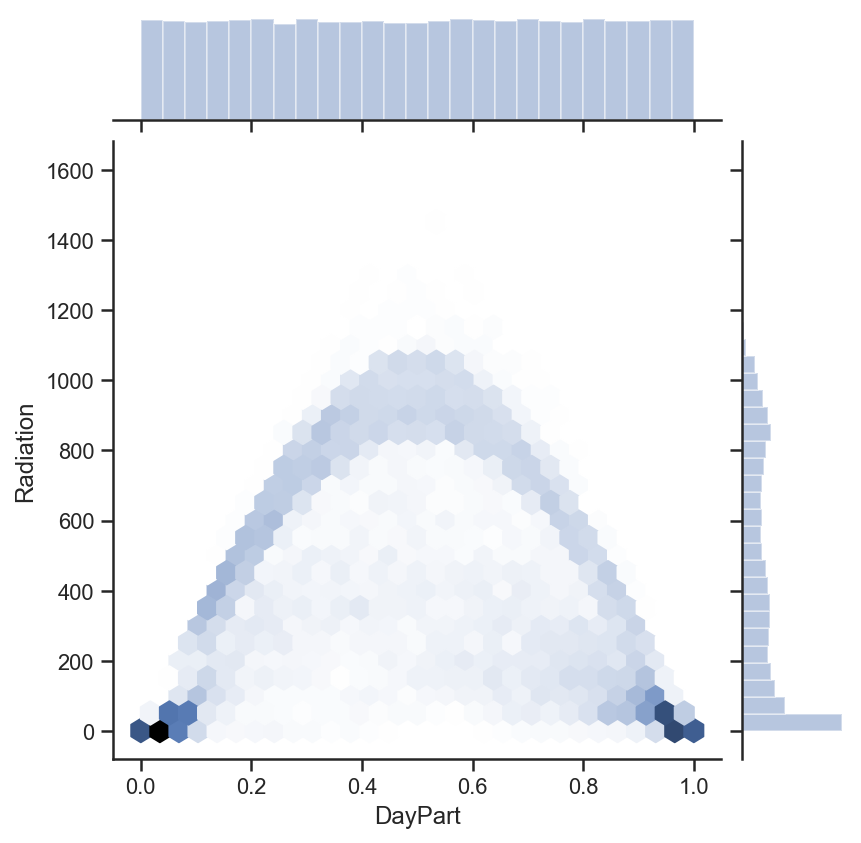

In [17]:
sns.jointplot(x="DayPart", y="Radiation", data=dfd, kind="hex");

Посмотрим также на&nbsp;зависимость мощности солнечного излучения от&nbsp;температуры:

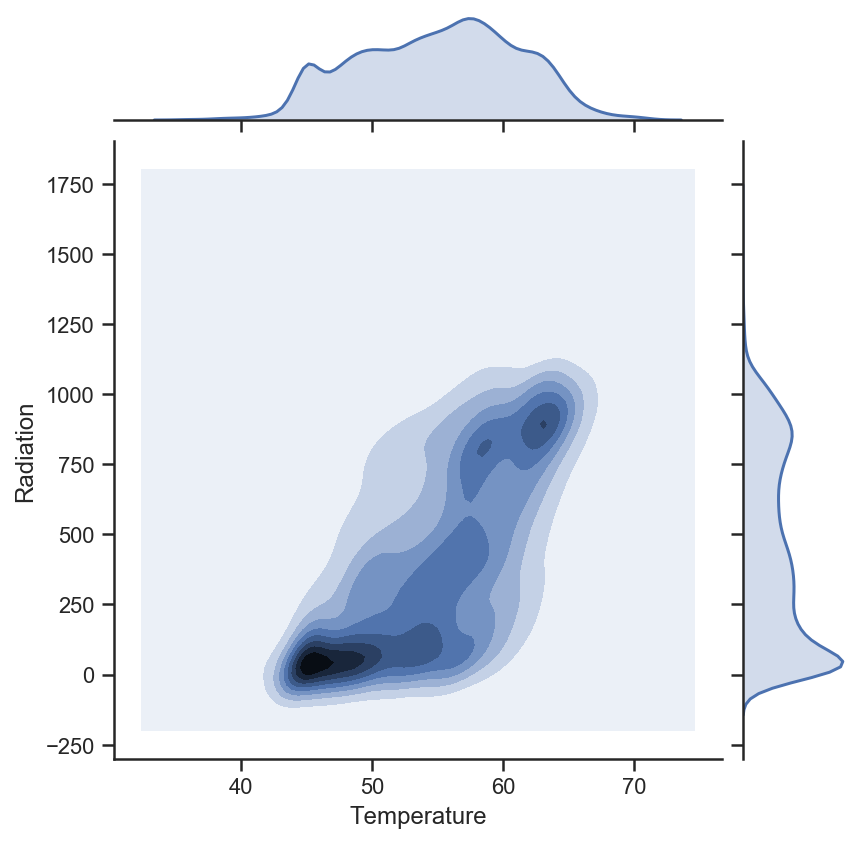

In [18]:
sns.jointplot(x="Temperature", y="Radiation", data=dfd, kind="kde");

Видно, что некоторая зависимость определённо есть, но не&nbsp;настолько большая, насколько хотелось бы. Возможно на&nbsp;большей выборке эта зависимость стала бы ещё менее заметной.

Построим парные диаграммы по&nbsp;всем показателям по&nbsp;исходному набору данных:

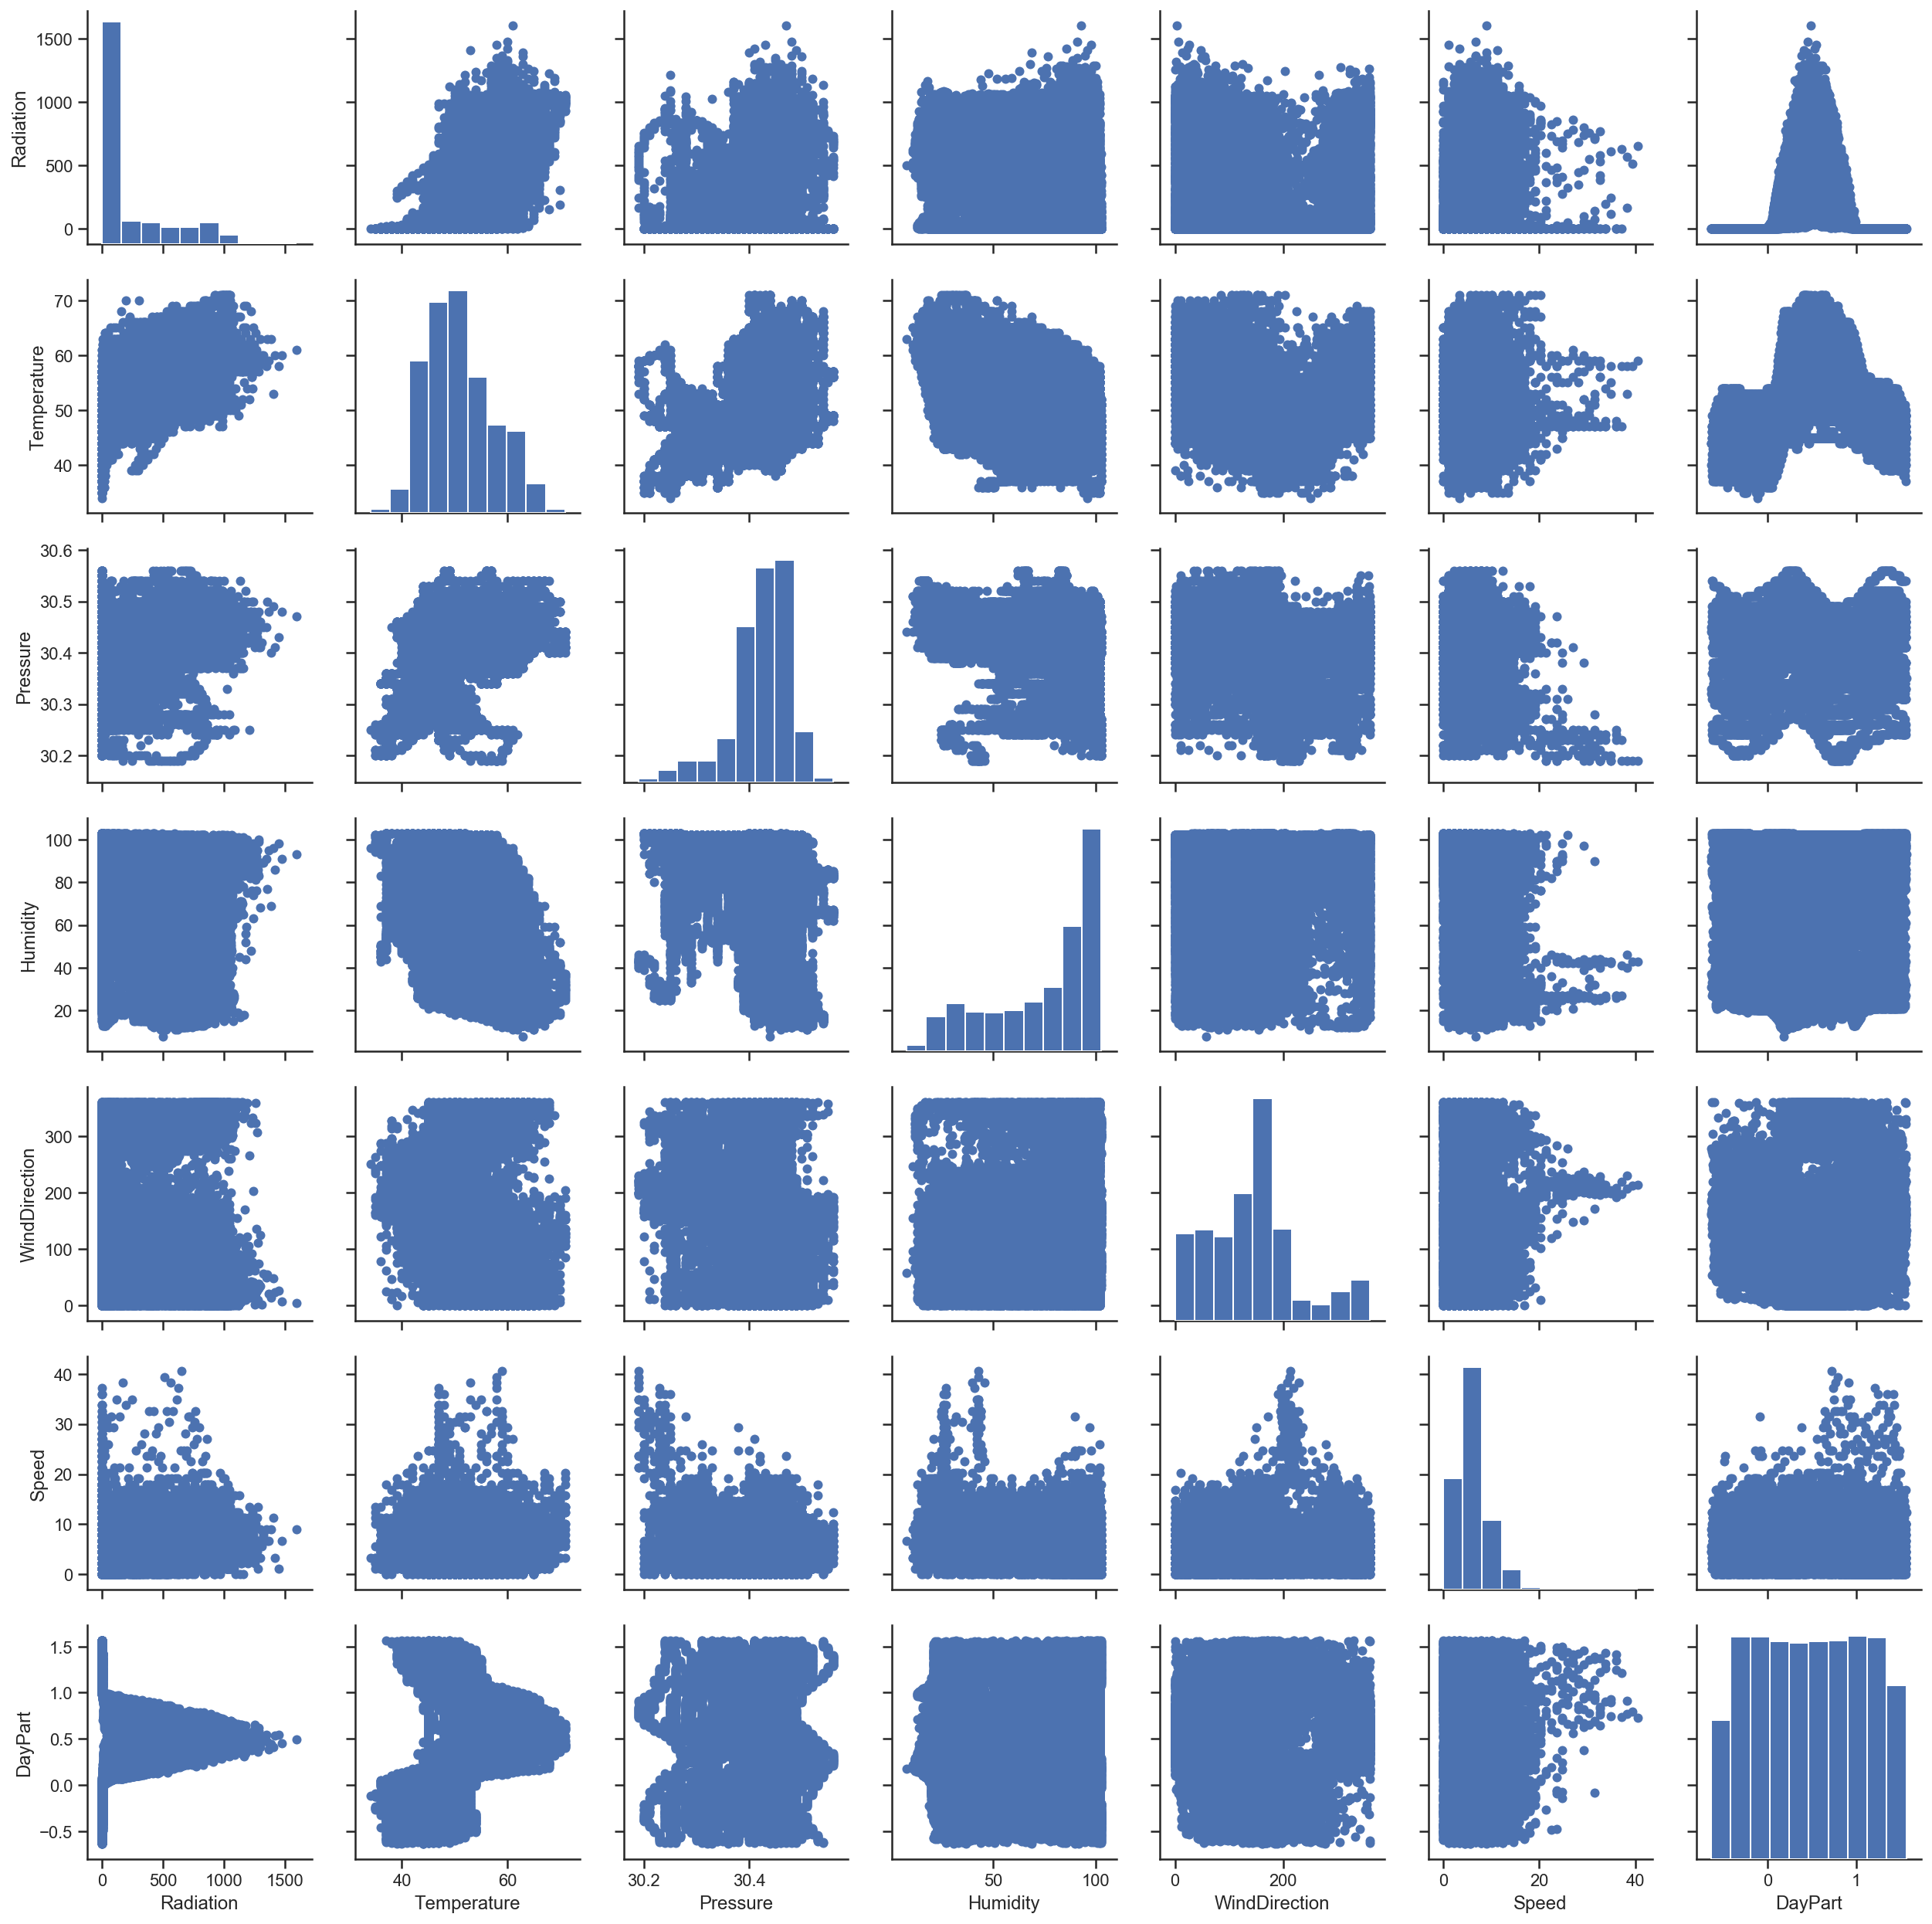

In [19]:
sns.pairplot(df, plot_kws=dict(linewidth=0));

Видно, что зависимости между колонками весьма сложные и в&nbsp;большинстве своём нелинейные. Какого-то показателя, точно определяющего мощность излучения, не&nbsp;наблюдается. Вместе с&nbsp;тем чётко видно, что время суток ограничивает мощность излучения сверху, что вполне может быть полезно для&nbsp;модели машинного обучения.

### Корреляционный анализ

Построим корреляционную матрицу по всему набору данных:

In [20]:
df.corr()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,DayPart
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,0.005980
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,0.198520
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,0.094403
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,0.075513
WindDirection,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,-0.078130
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,-0.056095
DayPart,0.005980,0.198520,0.094403,0.075513,-0.078130,-0.056095,1.000000


Визуализируем корреляционную матрицу с&nbsp;помощью тепловой карты:

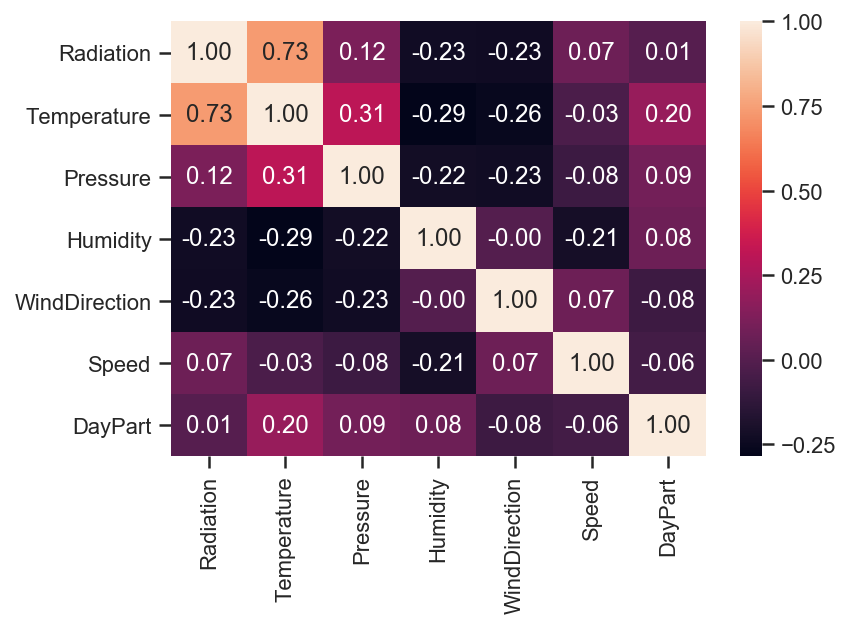

In [21]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

Видно, что мощность солнечного излучения заметно коррелирует с&nbsp;температурой, что было показано выше с&nbsp;помощью парного графика. Остальные признаки коррелируют друг с&nbsp;другом довольно слабо. Построению моделей машинного обучения ничего не&nbsp;мешает, но насколько хорошо они будут работать — вопрос открытый.

## Подготовка данных для обучения моделей
Разделим данные на&nbsp;целевой столбец и признаки:

In [22]:
X = df.drop("Radiation", axis=1)
y = df["Radiation"]

In [23]:
print(X.head(), "\n")
print(y.head())

   Temperature  Pressure  Humidity  WindDirection  Speed   DayPart
0           48     30.46        59         177.39   5.62  1.475602
1           48     30.46        58         176.78   3.37  1.468588
2           48     30.46        57         158.75   3.37  1.461713
3           48     30.46        60         137.71   3.37  1.454653
4           48     30.46        62         104.95   5.62  1.447778 

0    1.21
1    1.21
2    1.23
3    1.21
4    1.17
Name: Radiation, dtype: float64


In [24]:
print(X.shape)
print(y.shape)

(32686, 6)
(32686,)


Предобработаем данные, чтобы методы работали лучше:

In [25]:
from sklearn.preprocessing import StandardScaler

columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()

,Temperature,Pressure,Humidity,WindDirection,Speed,DayPart
count,3.268600e+04,3.268600e+04,3.268600e+04,3.268600e+04,3.268600e+04,3.268600e+04
mean,5.565041e-16,2.904952e-14,1.391260e-17,6.956302e-17,-9.738822e-17,5.217226e-18
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-2.758117e+00,-4.259540e+00,-2.578560e+00,-1.724255e+00,-1.788859e+00,-1.855112e+00
25%,-8.229646e-01,-4.184734e-01,-7.316829e-01,-7.366250e-01,-8.233591e-01,-8.683240e-01
50%,-1.779139e-01,1.302504e-01,3.841386e-01,5.062367e-02,-1.787376e-01,2.279483e-03
75%,6.283995e-01,6.789742e-01,8.458578e-01,4.307058e-01,4.658840e-01,8.682924e-01
max,3.208603e+00,2.508053e+00,1.076717e+00,2.602741e+00,9.814329e+00,1.797910e+00


## Выбор метрик

Напишем функцию, которая считает метрики построенной модели:

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))

Очевидно, что все эти метрики подходят для&nbsp;задачи регрессии. При&nbsp;этом средняя абсолютная ошибка (`mean_absolute_error`) будет показывать, насколько в&nbsp;среднем мы ошибаемся, медианная абсолютная ошибка (`median_absolute_error`) — насколько мы ошибаемся на&nbsp;половине выборки, а коэффициент детерминации $R^2$ (`r2_score`) хорош тем, что он показывает качество модели машинного обучения в&nbsp;задачи регрессии без&nbsp;сравнения с&nbsp;другими моделями.

## Выбор моделей
В качестве моделей машинного обучения выберем хорошо показавшие себя в&nbsp;лабораторных работах модели:

* Метод $k$ ближайших соседей (`KNeighborsRegressor`)
* Дерево решений (`DecisionTreeRegressor`)
* Случайный лес (`RandomForestRegressor`)

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Формирование обучающей и тестовой выборок

Разделим выборку на&nbsp;обучающую и тестовую:

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.25, random_state=346705925)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24514, 6)
(8172, 6)
(24514,)
(8172,)


## Построение базового решения

## Метод $k$ ближайших соседей

Попробуем метод $k$ ближайших соседей с&nbsp;гиперпараметром $k=5$:

In [30]:
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_5.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Проверим метрики построенной модели:

In [31]:
test_model(knn_5)

mean_absolute_error: 55.39857905041605
median_absolute_error: 4.017000000000004
r2_score: 0.8677873476991447


Видно, что данный метод даже без настройки гиперпараметров уже показывает очень неплохой результат.

## Дерево решений

Попробуем дерево решений с неограниченной глубиной дерева:

In [32]:
dt_none = DecisionTreeRegressor(max_depth=None)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Проверим метрики построенной модели:

In [33]:
test_model(dt_none)

mean_absolute_error: 50.31291483113069
median_absolute_error: 0.7249999999999659
r2_score: 0.8297706825392527


Видно, что данный метод также без настройки гиперпараметров показывает приличный результат.

### Случайный лес

Попробуем случайный лес с&nbsp;гиперпараметром $n=100$:

In [34]:
ran_100 = RandomForestRegressor(n_estimators=100)
ran_100.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Проверим метрики построенной модели:

In [35]:
test_model(ran_100)

mean_absolute_error: 37.503140332843856
median_absolute_error: 0.5816499999999999
r2_score: 0.917512922249891


Видно, что данный метод даже без&nbsp;настройки гиперпараметров показывает очень хороший результат.

## Подбор гиперпараметров

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

### Метод $k$ ближайших соседей

Введем список настраиваемых параметров:

In [37]:
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'n_neighbors': param_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

Запустим подбор параметра:

In [38]:
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

Проверим результаты при&nbsp;разных значения гиперпараметра на&nbsp;тренировочном наборе данных:

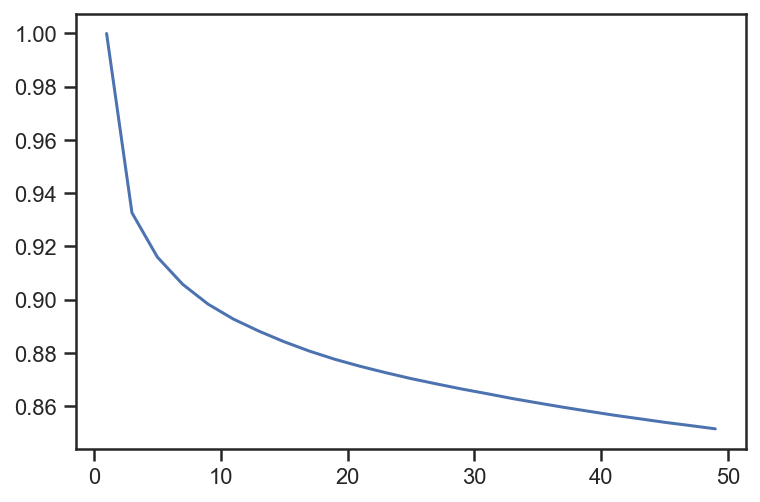

In [39]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

В&nbsp;целом результат ожидаемый&nbsp;— чем больше обученных моделей, тем лучше.

На&nbsp;тестовом наборе данных картина похожа:

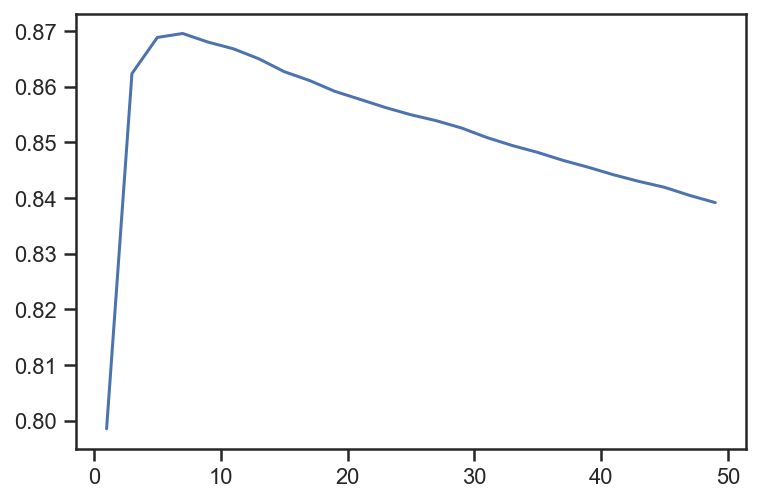

In [40]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

Видно, что наилучший результат достигается при $k=7$.

In [41]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 56.07154831829942
median_absolute_error: 4.7735714285714295
r2_score: 0.8687906728428422


Сравним с исходной моделью:

In [42]:
test_model(knn_5)

mean_absolute_error: 55.39857905041605
median_absolute_error: 4.017000000000004
r2_score: 0.8677873476991447


Здесь получили чуть-чуть больший коэффициент детерминации, но незначительно просели по&nbsp;остальным показателям. Так что делаем вывод, что коэффициент детерминации сам по&nbsp;себе не&nbsp;является идеальной метрикой, и даёт лишь общее представление о&nbsp;качестве модели.

### Дерево решений

Введем список настраиваемых параметров:

In [43]:
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

Запустим подбор параметра:

In [44]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Проверим результаты при&nbsp;разных значения гиперпараметра на&nbsp;тренировочном наборе данных:

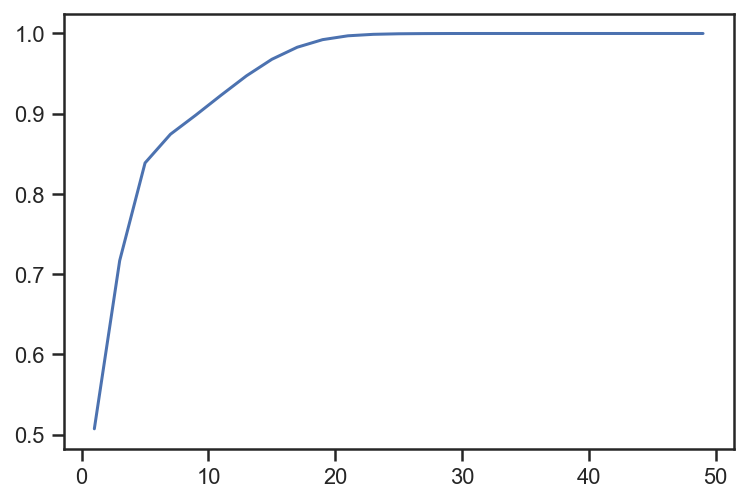

In [45]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

В&nbsp;целом результат ожидаемый&nbsp;— чем больше обученных моделей, тем лучше.

На&nbsp;тестовом наборе данных картина похожа:

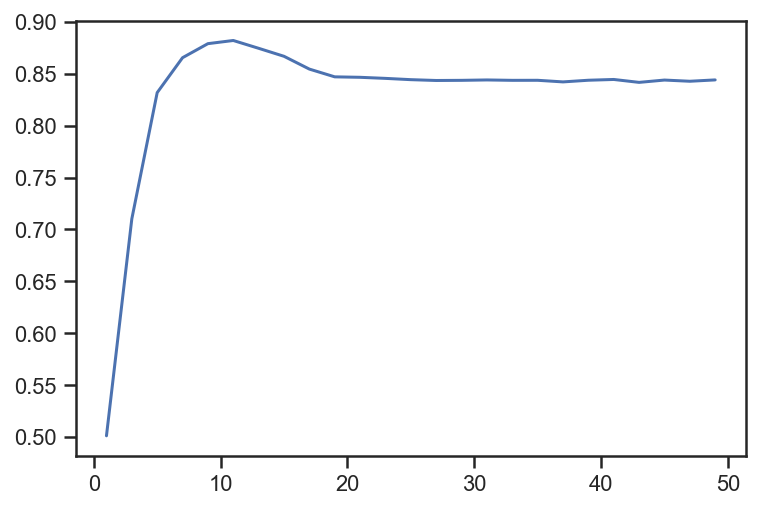

In [46]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

На&nbsp;графике чётко видно, что модель сначала работает хорошо, а потом начинает переобучаться на&nbsp;тренировочной выборке.

In [47]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 48.51672010318737
median_absolute_error: 0.8996284533171739
r2_score: 0.8698555775877016


Сравним с исходной моделью:

In [48]:
test_model(dt_none)

mean_absolute_error: 50.31291483113069
median_absolute_error: 0.7249999999999659
r2_score: 0.8297706825392527


Конкретно данная модель оказалась немного лучше, чем исходная.

### Случайный лес

Введем список настраиваемых параметров:

In [49]:
param_range = np.arange(20, 201, 20)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])}]

Запустим подбор параметра:

In [50]:
gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=160,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Проверим результаты при&nbsp;разных значения гиперпараметра на&nbsp;тренировочном наборе данных:

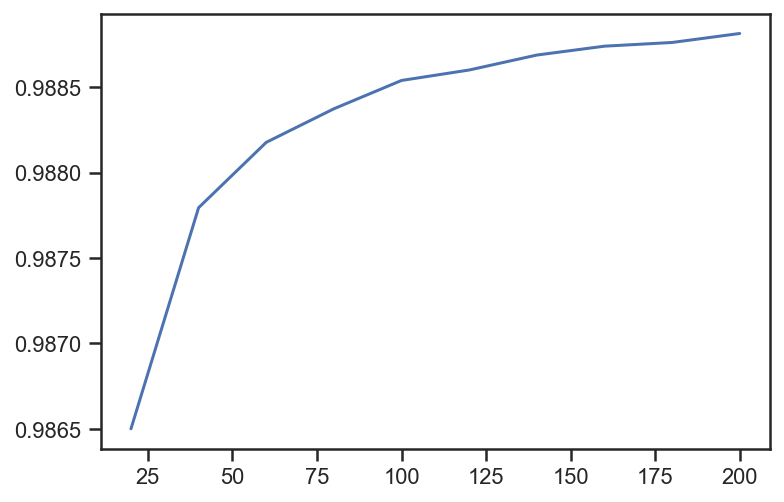

In [51]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

В&nbsp;целом результат ожидаемый&nbsp;— чем больше обученных моделей, тем лучше.

На&nbsp;тестовом наборе данных картина похожа:

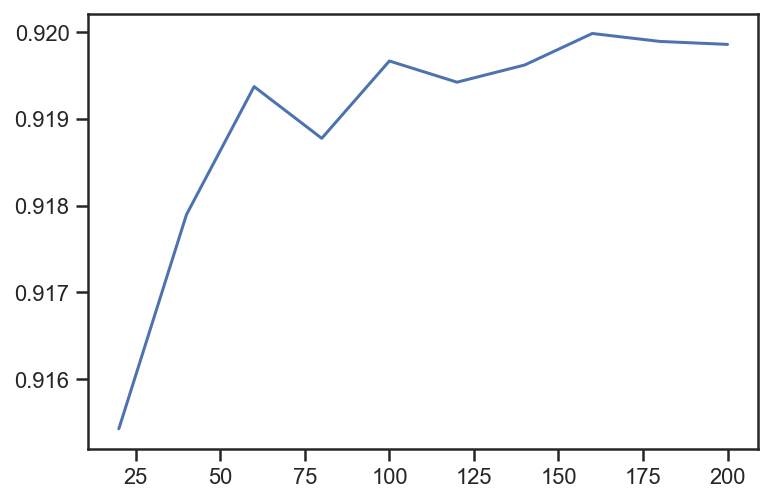

In [52]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

Из-за случайнойсти график немного плавает, но в&nbsp;целом получился чётко выраженный пик с&nbsp;наилучшим результатом.

In [53]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 37.83773731185756
median_absolute_error: 0.6211875000000019
r2_score: 0.916153539481388


Сравним с исходной моделью:

In [54]:
test_model(ran_100)

mean_absolute_error: 37.503140332843856
median_absolute_error: 0.5816499999999999
r2_score: 0.917512922249891


Данная модель также оказалась лишь немного лучше, чем исходная.

# Выводы

Все построенные модели обладают очень хорошими показателями. Ансамблевая модель при&nbsp;этом обладает наилучшими характеристиками. Таким образом для&nbsp;дальнейшей работы стоит использовать именно ее.